# Regex

In [1]:
import re

In [2]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [3]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[!.?]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


In [5]:
with open('../dataset/nlp_scene_one.txt', 'r') as f:
    scene_one = f.read()

In [9]:
# Import necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)


{'weight', 'goes', 'Ridden', 'my', 'empty', 'south', 'sun', 'not', 'Oh', 'swallow', 'is', 'grip', 'search', 'but', 'son', 'The', 'speak', 'But', 'yeah', 'house', 'covered', 'Wait', 'then', 'Saxons', '!', 'line', 'defeator', 'that', 'length', 'all', 'SCENE', 'coconut', 'maybe', 'wind', 'sovereign', 'seek', 'use', 'guiding', "'em", 'Well', 'are', 'Am', 'bring', 'its', 'tropical', 'he', 'here', 'King', 'could', 'lord', 'We', 'times', 'ounce', 'minute', ':', 'breadth', 'warmer', 'Britons', 'anyway', ']', 'will', 'Uther', 'by', 'our', 'air-speed', 'grips', 'climes', 'carry', 'temperate', "'s", 'It', 'me', 'am', 'where', 'together', 'pound', "'ve", "'", 'bird', 'velocity', 'this', 'interested', 'to', 'agree', 'mean', 'under', '#', 'dorsal', 'these', 'SOLDIER', 'KING', 'What', 'snows', 'So', 'found', "n't", 'Supposing', 'Listen', 'bangin', 'husk', '[', 'No', 'who', 'on', 'That', 'at', 'swallows', 'Who', 'they', 'needs', 'every', 'other', 'Arthur', 'Found', 'of', 'European', 'coconuts', 'Pull'

In [10]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

581 589


In [11]:
pattern1 = r"\[.*]"
print(re.search(pattern1, scene_one))

<re.Match object; span=(10, 33), match='[wind] [clop clop clop]'>


In [12]:
pattern2 = r"[\w\s#]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


In [15]:
from nltk.tokenize import TweetTokenizer, regexp_tokenize

tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [16]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [17]:
pattern2 = r"([@#]\w+)"
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [18]:
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


Unicode ranges for emoji are:

('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF').


In [19]:
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

In [20]:
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


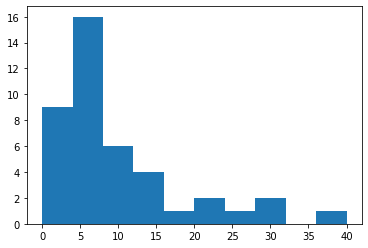

In [23]:
from matplotlib import pyplot as plt

# Split the script into lines: lines
lines = scene_one.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

# Topics Identification

In [33]:
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import itertools

In [2]:
with open('../dataset/nlp_article.txt', 'r') as f:
    article = f.read()

In [3]:
tokens = word_tokenize(article)
lower_tokens = [w.lower() for w in tokens]
bow_simple = Counter(lower_tokens)
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 66), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


In [16]:
from nltk import download
download('stopwords')
download('wordnet')

[nltk_data] Downloading package stopwords to /Users/Danny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Danny/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
english_stops = stopwords.words('english')

In [5]:
alpha_only = [t for t in lower_tokens if t.isalpha()]
no_stops = [t for t in alpha_only if t not in english_stops]
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized)
print(bow.most_common(10))

[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


In [6]:
from gensim.corpora import Dictionary

In [26]:
dictionary = Dictionary([lemmatized])
file_id = dictionary.token2id.get('file')
print(dictionary.get(file_id))

corpus = [dictionary.doc2bow([article]) for article in [article]]

file


In [35]:
doc = corpus[0]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [36]:
from gensim.models.tfidfmodel import TfidfModel

In [37]:
tfidf = TfidfModel(corpus)

In [38]:
tfidf_weights = tfidf[doc]

In [40]:
print(tfidf_weights[:5])

sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

[]


# Name Entity Recognition 

In [137]:
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import ne_chunk_sents

from matplotlib import pyplot as plt

wordnet_lemmatizer = WordNetLemmatizer()
eng_stopwords = stopwords.words('english')

In [132]:
with open('../dataset/nlp_ner_article.txt', 'r') as f:
    article = f.read()

In [149]:
sentences = sent_tokenize(article)
token_sentences = [word_tokenize(sent) for sent in sentences]
token_sentences_rm_punc = [[w for w in sent if w.isalpha()] for sent in token_sentences]
token_sentences_rm_stop = [[w for w in sent if w not in eng_stopwords] for sent in token_sentences_rm_punc]
token_sentences_stem = [[wordnet_lemmatizer.lemmatize(w) for w in sent] for sent in token_sentences_rm_stop]


In [150]:
pos_sentences = [pos_tag(sent) for sent in token_sentences_stem]
chunked_sentences = ne_chunk_sents(pos_sentences, binary=True)

In [ ]:
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

In [ ]:
for sent in chunked_sentences:
    for chunk in sent:
        print(chunk)

In [152]:
chunked_sentences = ne_chunk_sents(pos_sentences)

ner_categories = defaultdict(int)

# count entity, stored in defaultdict
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1

In [153]:
labels, values = [], []
for k, v in ner_categories.items():
    labels.append(k)
    values.append(v)

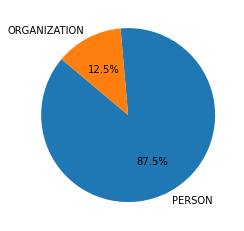

In [154]:
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

# SpaCy

In [1]:
import spacy

!python -m spacy download en_core_web_sm

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
with open('../dataset/nlp_ner_article.txt', 'r') as f:
    article = f.read()

In [4]:
doc = nlp(article)

In [5]:
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Apple
PERSON Uber
FAC Travis Kalanick of Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


----

# Sklearn Bag of Word

In [ ]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(pred, y_test)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])
